Some of the codes in this notebook are taken from my [project](https://github.com/lucienaxiao/Udacity_Projects/blob/main/ML_FindingCharityDonors.ipynb)
    for the Udacity Machine Learning Nanodegree.

In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/udacity-mlcharity-competition/census.csv
/kaggle/input/udacity-mlcharity-competition/example_submission.csv
/kaggle/input/udacity-mlcharity-competition/test_census.csv


# Load Data

In [89]:
df = pd.read_csv('../input/udacity-mlcharity-competition/census.csv')
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [90]:
testdf = pd.read_csv('../input/udacity-mlcharity-competition/test_census.csv')
testdf.head()

,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


In [91]:
testdf = testdf.drop(['Unnamed: 0'], axis=1)
testdf.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


# Feature Engineering

First, check for missing data in the training and testing data.

In [60]:
df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [61]:
testdf.isnull().sum()

age                17
workclass          22
education_level    20
education-num      14
marital-status     21
occupation         22
relationship       16
race               19
sex                19
capital-gain       15
capital-loss       17
hours-per-week     13
native-country     16
dtype: int64

There's no missing data in the training set, but the testing set has missing values in every column.

Before filling in missing values, we check whether education_level and education-num are correlated to reduce potentially redudant features.

In [62]:
df['education_level'].value_counts()

 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education_level, dtype: int64

In [63]:
df['education-num'].value_counts()

9.0     14783
10.0     9899
13.0     7570
14.0     2514
11.0     1959
7.0      1619
12.0     1507
6.0      1223
4.0       823
15.0      785
5.0       676
8.0       577
16.0      544
3.0       449
2.0       222
1.0        72
Name: education-num, dtype: int64

In [64]:
for edu in list(df['education_level'].unique()):
    print(df[df['education_level']==edu]['education-num'].unique())

[13.]
[9.]
[7.]
[14.]
[5.]
[10.]
[12.]
[4.]
[16.]
[11.]
[15.]
[3.]
[6.]
[1.]
[8.]
[2.]


We see there is a one-to-one correspondence betwen education_level and education-num, so we can remove education_level and keep education-num that has numerical values.

In [92]:
df = df.drop(['education_level'], axis = 1)
testdf = testdf.drop(['education_level'], axis = 1)

Now we are ready to fill in missing values in the testing set. The general idea is: for numerical values, we do so by using the means or modes of the corresponding column in the training set; for categorical values, we use the mode of the corresponding column in the training set.

However, before doing that, we should the distribution of each column to see whether it is reasonable to use mean or mode as fillers.

In [66]:
df.dtypes

age                 int64
workclass          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
income             object
dtype: object

In [93]:
# Separate column names into numerical and categorical columns
col = list(df.columns)
num_col = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_col = [c for c in col if c not in num_col]
cat_col

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

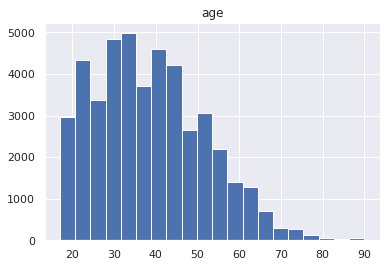

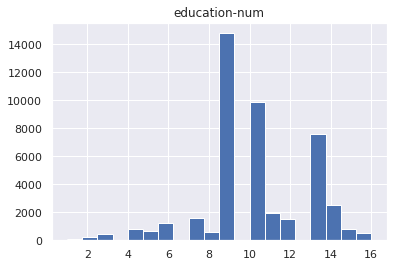

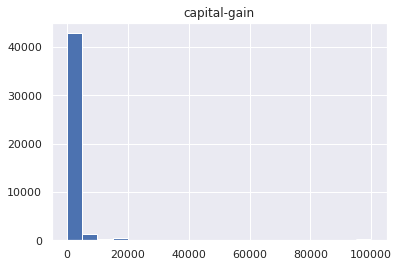

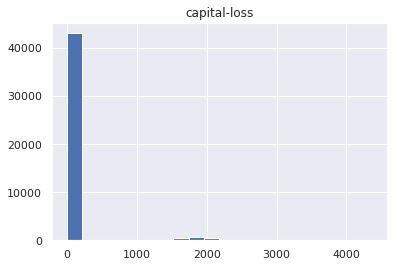

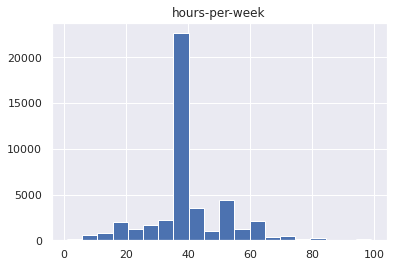

In [94]:
for i, col in enumerate(num_col):
    plt.figure(i)
    plt.hist(df[col], bins=20)
    plt.title(col)

We will use mean for age, mode for education-num, capital-gain, capital-loss, and hours-per-week.

To get a better visualization for the nonzero values in capital-gain and capital-loss, we visualize them separately.

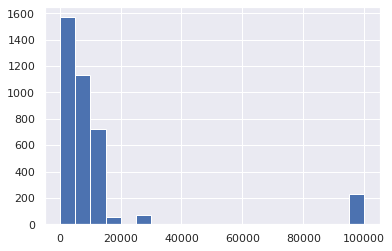

In [69]:
plt.hist(df[df['capital-gain']!=0]['capital-gain'], bins = 20);

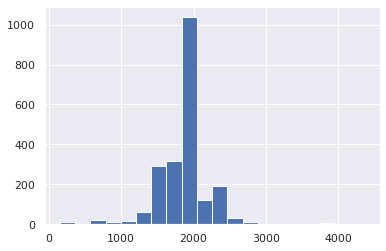

In [70]:
plt.hist(df[df['capital-loss']!=0]['capital-loss'], bins = 20);

From these histograms we can see both capital-gain and capital-loss are highly-skewed, and algorithms can be sensitive to such distributions. Thus, we apply a logarithmic transformation to normalize the data.

In [95]:
skewed = ['capital-gain', 'capital-loss']
df[skewed] = df[skewed].apply(lambda x: np.log(x + 1))
testdf[skewed] = testdf[skewed].apply(lambda x: np.log(x + 1))

Now, we take a look at the categorical columns

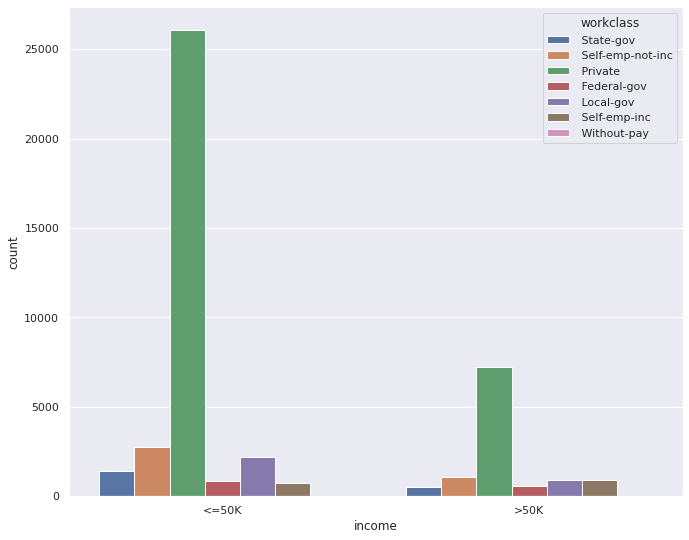

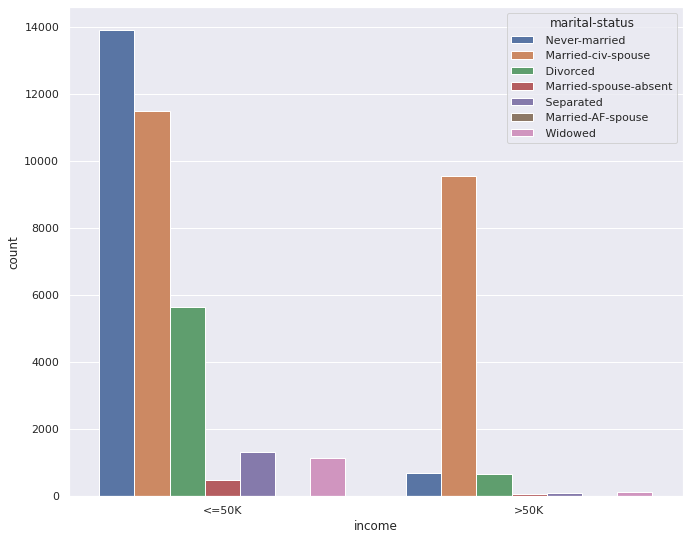

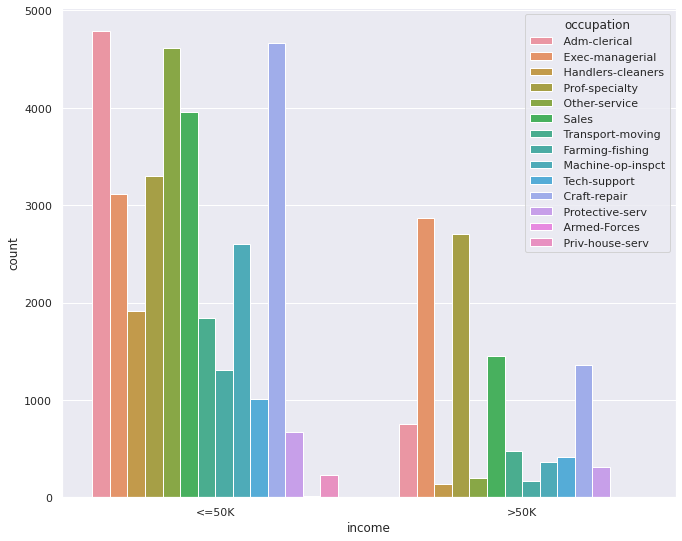

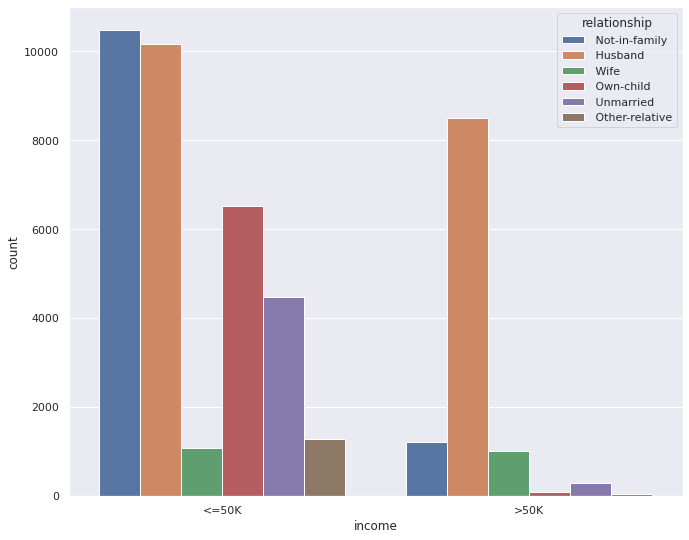

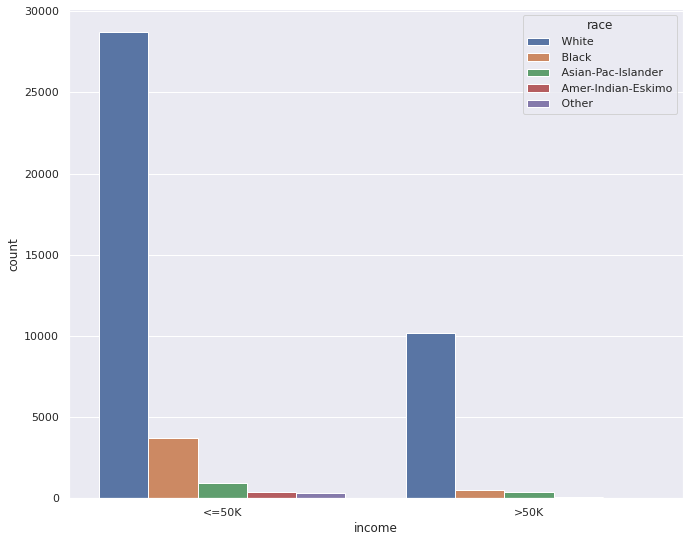

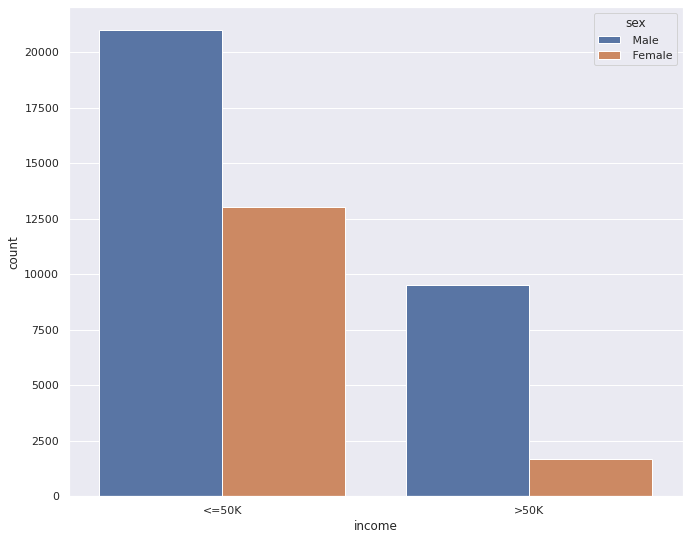

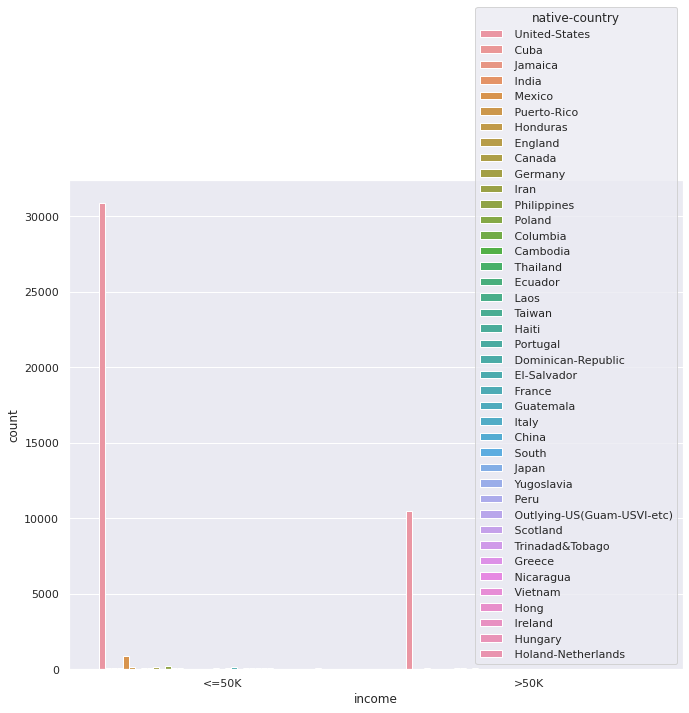

In [96]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,9)})
for i, col in enumerate(['workclass','marital-status','occupation','relationship', 'race', 'sex', 'native-country']):
    plt.figure(i)
    sns.countplot(x='income', hue=col, data=df)

In [73]:
df['relationship'].value_counts()

 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1349
Name: relationship, dtype: int64

In [74]:
df['marital-status'].value_counts()

 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital-status, dtype: int64

In [75]:
df['occupation'].value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [76]:
df['sex'].value_counts()

 Male      30527
 Female    14695
Name: sex, dtype: int64

For the above analysis, we see that we can safely fill out the missing values in workclass, sex, relationship, marital-status, race and native country using the mode. For occupation, Craft-repair, Prof-specialty and Exec-managerial have around the same number of entries, among which Exec-managerial is more evenly distributed across the two income categories, so we will fill the occupation column with Exec-managerial.

mean for age, mode for education-num, capital-gain, capital-loss, and hours-per-week

In [97]:
testdf['age'] = testdf['age'].fillna(df['age'].mean())
testdf['occupation'] = testdf['occupation'].fillna(' Exec-managerial')

In [98]:
for col in ['education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex',
            'workclass', 'relationship', 'marital-status', 'race', 'native-country']:
    testdf[col] = testdf[col].fillna(df[col].mode()[0])
testdf.isnull().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [99]:
# Normalize numerical data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical] = scaler.fit_transform(df[numerical])
testdf[numerical] = scaler.transform(testdf[numerical])

In [100]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1})

In [101]:
income = df['income']
features = df.drop(['income'], axis = 1)

In [102]:
df_all = pd.concat([features, testdf], axis=0)

In [103]:
for col in ['workclass','marital-status','occupation','relationship', 'race', 'sex', 'native-country']:
    df_all[col] = df_all[col].astype('category')
    df_all[col] = df_all[col].cat.codes

In [104]:
features.shape

(45222, 12)

In [105]:
features_encoded = df_all.iloc[:45222,:]
testdf_encoded = df_all.iloc[45222:, :]

# Training and Testing

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_encoded, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

First, we create a training and predicting pipeline to quickly and effectively train models using various sizes of training data and perform predictions on the testing data.

Now we import the models, train and evaluate the accuracy scores and F-scores.

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.metrics import roc_curve, auc


clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7793463757372612

Next, we find tune the model parameters. The code for this section are taken almost verbatim from [this article](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae).

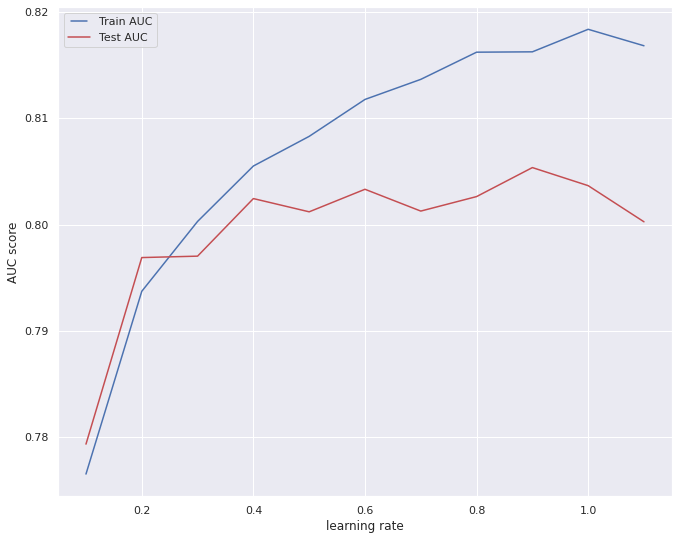

In [108]:
# Find the optimal learning_rate
learning_rates = np.linspace(0.1, 1.1, num=11)
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

We see that in our case a learning rate of 0.9 is optimal 

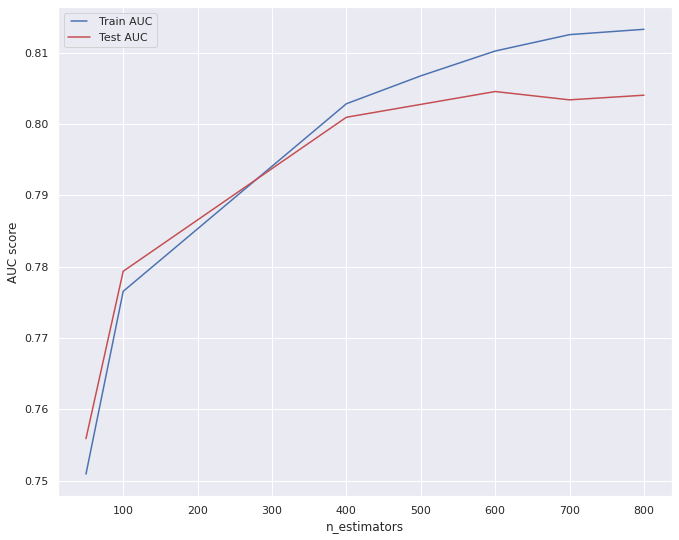

In [109]:
# Find the best n_estimators
n_estimators = [50, 100, 400, 500, 600, 700, 800]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

We see the best n_estimators is 600.

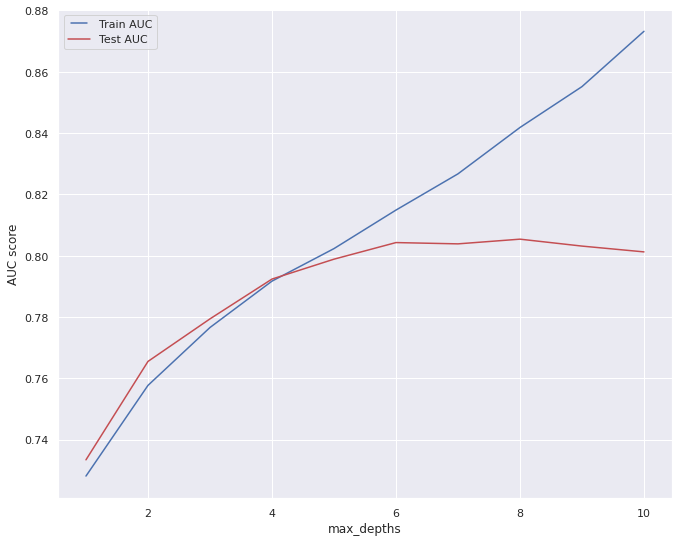

In [111]:
# Find the best max_depth
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

We see that the best max_depth is 8.

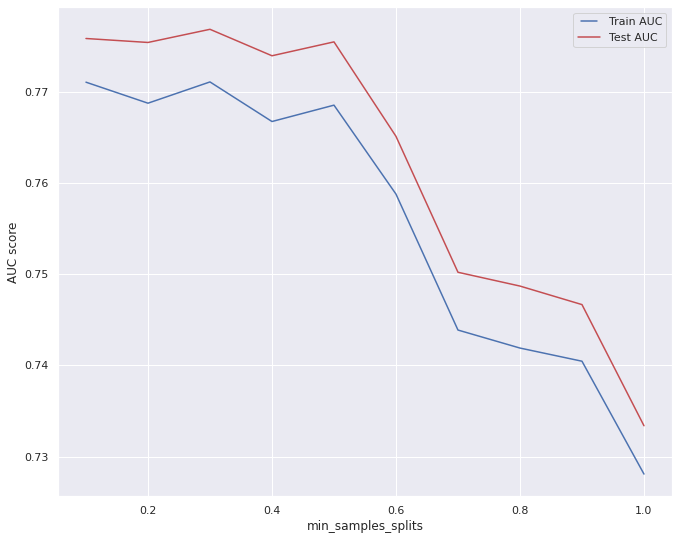

In [112]:
# Find the best min_samples_splits
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

We see that there is a underfitting so we need all the samples at each node.

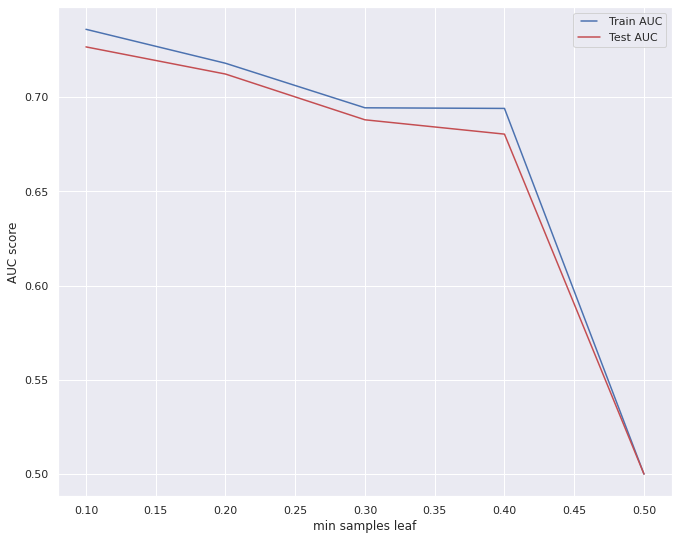

In [117]:
# Find the best min_samples_leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

Same as the previous case, including this parameter will cause underfitting.

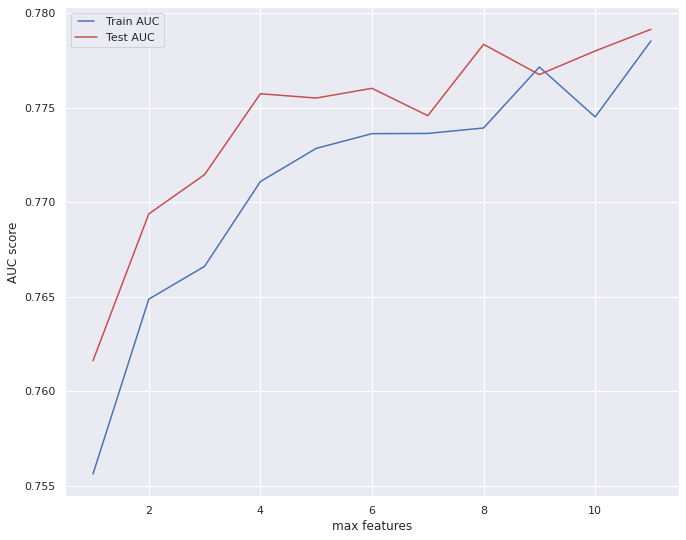

In [118]:
# Find the best max_features
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

It seems that we need all the features. 

Summarizing all the tuning results together, we train the following model and use it to predict.

In [124]:
tuned_clf = GradientBoostingClassifier(learning_rate=0.9, n_estimators=600, max_depth=8)
tuned_clf.fit(X_train, y_train)
y_pred = tuned_clf.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7786336094369419

# Prepare submission

In [125]:
sub=pd.read_csv('/kaggle/input/udacity-mlcharity-competition/example_submission.csv')
sub.head()

,id,income
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [128]:
testdf.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.054795,Private,0.333333,Married-civ-spouse,Craft-repair,Husband,White,Male,0.000000,0.0,0.397959,United-States
1,0.438356,Private,0.800000,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.000000,0.0,0.397959,United-States
2,0.369863,Self-emp-not-inc,0.733333,Married-civ-spouse,Other-service,Wife,White,Female,0.000000,0.0,1.000000,United-States
3,0.232877,Private,0.800000,Married-civ-spouse,Sales,Husband,White,Male,0.772653,0.0,0.459184,United-States
4,0.095890,Private,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States


In [129]:
sub['income']=tuned_clf.predict(testdf_encoded)

In [130]:
sub.to_csv('submission.csv',index=False)